In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [27]:
data=pd.read_csv("D:\project_DEPI\credit_card_transactions.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [29]:
# Summary statistics
print(data.describe())

# Checking missing values
print(data.isnull().sum())

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.

In [30]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [31]:
data.drop(columns=['Unnamed: 0'],inplace=True)#it's like index 

In [32]:
corr_matrix = data.corr()
#correlation between "is_fraud" & every Features
print(corr_matrix['is_fraud'].sort_values(ascending=False))

C:\Users\ZBook\AppData\Local\Temp\ipykernel_10040\2412871501.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


is_fraud         1.000000
amt              0.219404
city_pop         0.002136
lat              0.001894
merch_lat        0.001741
merch_long       0.001721
long             0.001721
cc_num          -0.000981
zip             -0.002162
merch_zipcode   -0.002992
unix_time       -0.005078
Name: is_fraud, dtype: float64


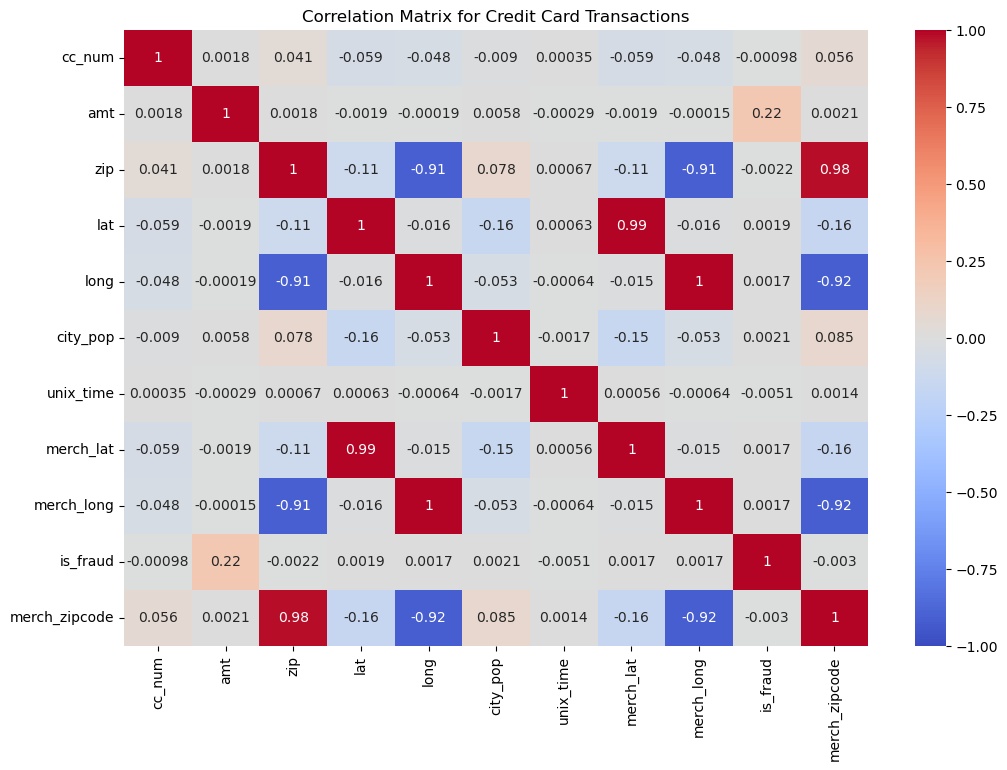

In [33]:
# Visualizing the Correlation between Columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True # to print the number in square 
            , cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Credit Card Transactions')
plt.show()

In [34]:
# Drop unnecessary columns
data = data.drop(columns=['trans_date_trans_time', 'trans_num', 'unix_time', 'dob', 'first', 'last'])

In [35]:
# fill missing values
data['merch_zipcode'].fillna(data['merch_zipcode'].mean(), inplace=True)

In [36]:
data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,merch_zipcode
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,28705.000000
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,46825.754151
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,83236.000000
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,46825.754151
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,22844.000000


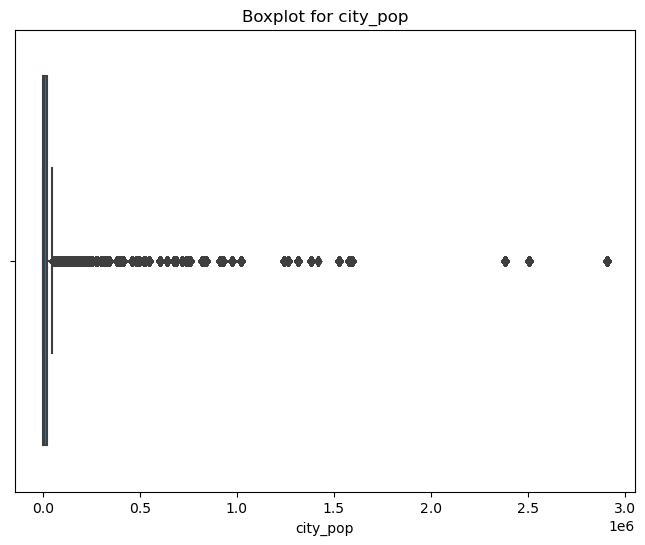

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["city_pop"])
plt.title(f'Boxplot for {"city_pop"}')
plt.show()

In [38]:
# Use IQR to determine the boundaries of outliers
Q1 = data["city_pop"].quantile(0.25)
Q3 = data["city_pop"].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outlierslower_bound = Q1 - 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_value = data["city_pop"].mean()
data["city_pop"] = np.where((data["city_pop"] < lower_bound) | (data["city_pop"] > upper_bound), mean_value, data["city_pop"])

print(data["city_pop"].describe())

count    1.296675e+06
mean     2.088621e+04
std      3.360244e+04
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      8.882444e+04
Name: city_pop, dtype: float64


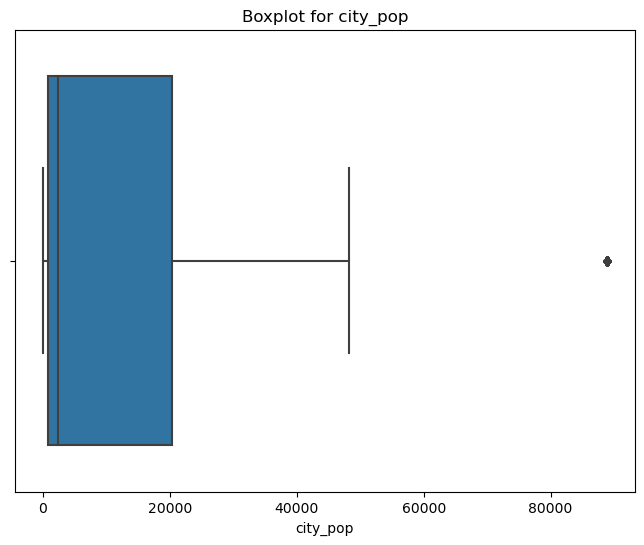

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["city_pop"])
plt.title(f'Boxplot for {"city_pop"}')
plt.show()

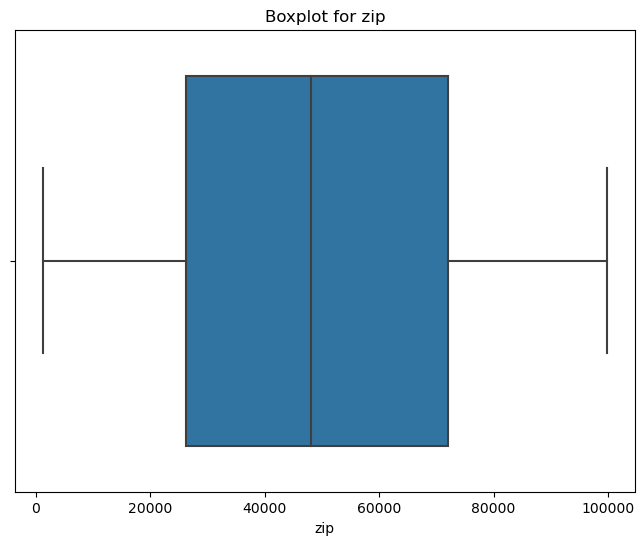

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["zip"])
plt.title(f'Boxplot for {"zip"}')
plt.show()

In [41]:
print("number of unique values in every columns")
for col in data.columns:
    unique_values = data[col].nunique()  # عدد التصنيفات في العمود
    print("******************************************")
    print(f'{col}: {unique_values} unique values')

number of unique values in every columns
******************************************
cc_num: 983 unique values
******************************************
merchant: 693 unique values
******************************************
category: 14 unique values
******************************************
amt: 52928 unique values
******************************************
gender: 2 unique values
******************************************
street: 983 unique values
******************************************
city: 894 unique values
******************************************
state: 51 unique values
******************************************
zip: 970 unique values
******************************************
lat: 968 unique values
******************************************
long: 969 unique values
******************************************
city_pop: 733 unique values
******************************************
job: 494 unique values
******************************************
merch_lat: 1247805 unique values

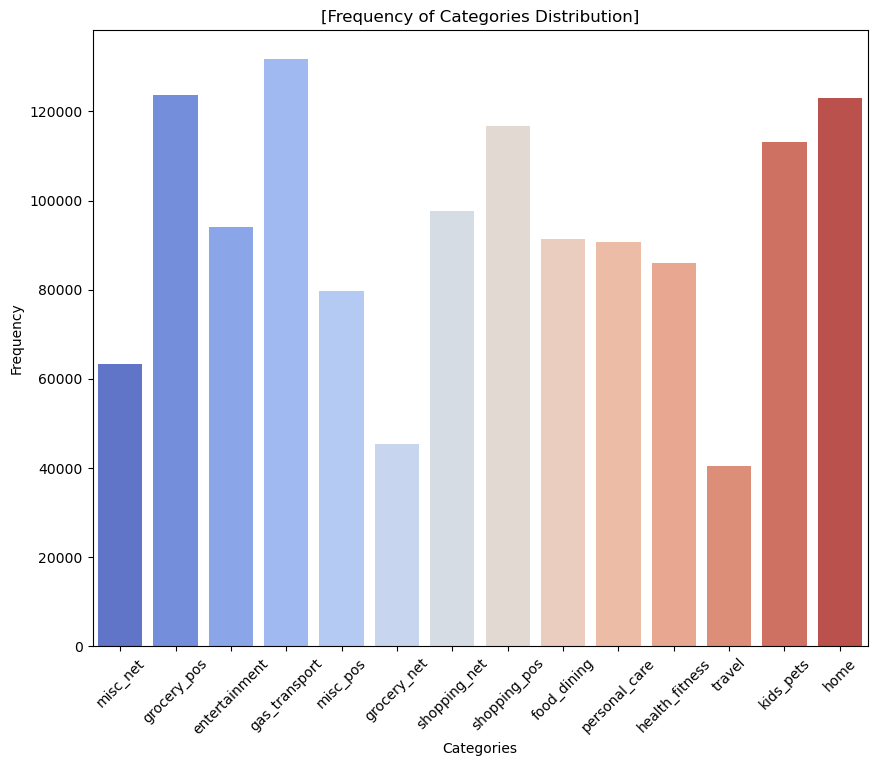

In [42]:
#plot column "category"
plt.figure(figsize=[10,8])
sns.countplot(data=data , x='category', palette='coolwarm')#palette for color 
plt.xticks(rotation=45)#rotation words on x axis
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('[Frequency of Categories Distribution]')
plt.show()

In [43]:
#List of columns you want to encode
categorical_columns = ['category', 'gender', 'street', 'city', 'state', 'job','merchant']

# create object LabelEncoder
encoder = LabelEncoder()

# Apply the encoding to each column in the list
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [44]:
data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,merch_zipcode
0,2703186189652095,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495.0,370,36.011293,-82.048315,0,28705.000000
1,630423337322,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149.0,428,49.159047,-118.186462,0,46825.754151
2,38859492057661,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154.0,307,43.150704,-112.154481,0,83236.000000
3,3534093764340240,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939.0,328,47.034331,-112.561071,0,46825.754151
4,375534208663984,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99.0,116,38.674999,-78.632459,0,22844.000000


In [45]:
# Split data to Features & Target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [46]:
#Transform the data to values close to each other
columns = X.columns #save names of columns X in Variable "columns"
standerScaler = StandardScaler()
X = standerScaler.fit_transform(X)

In [47]:
#transform X to DataFrame
X_scaled = pd.DataFrame(X, columns=columns)

In [49]:
X_scaled.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,merch_zipcode
0,-0.316692,0.851654,0.452853,-0.407826,-0.909206,0.285529,0.312207,0.022519,-0.749136,-0.484420,0.657620,-0.517558,0.848099,-0.494354,0.593864,-7.613169e-01
1,-0.318757,-0.506880,-0.569266,0.230039,-0.909206,-0.189368,0.644767,1.418098,1.872567,2.039120,-2.033870,-0.617134,1.262061,2.078699,-2.030341,-3.056887e-16
2,-0.318728,0.234591,-1.591384,0.934149,1.099861,0.406932,0.087922,-0.954386,1.281042,0.717754,-1.601537,-0.497947,0.398450,0.902849,-1.592323,1.529723e+00
3,-0.316058,0.085302,-1.080325,-0.158132,1.099861,1.578106,-1.396996,-0.047260,0.402753,1.515617,-1.590766,-0.563864,0.548333,1.662886,-1.621848,-3.056887e-16
4,-0.318471,-0.228206,0.708382,-0.177094,1.099861,-0.250069,-0.886556,1.278540,-0.906090,-0.023035,0.782279,-0.618622,-0.964771,0.026941,0.841909,-1.007558e+00
